# Car detection using motion

In [10]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Get video object
vidcap = cv2.VideoCapture('../../data/motion_detection.mp4')

# Go to first frame and save this frame
success,image = vidcap.read()
cv2.imwrite('../../data/motion_detection_1.jpg', image)     # save frame as JPEG file  

# Go to second frame and save this frame
success,image = vidcap.read()
cv2.imwrite('../../data/motion_detection_2.jpg', image)     # save frame as JPEG file  

True

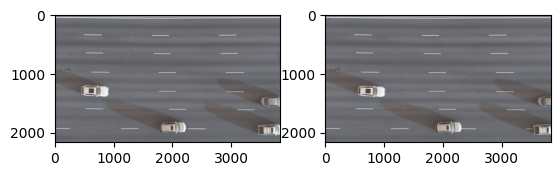

In [12]:
# Load images
image1 = cv2.imread('../../data/motion_detection_1.jpg')
image2 = cv2.imread('../../data/motion_detection_2.jpg')

# Convert images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Show images
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.show()

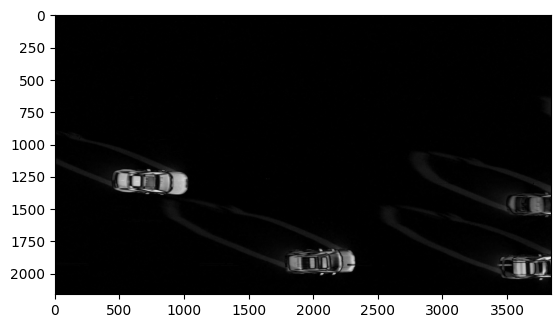

In [13]:
# Smooth image
smooth1 = cv2.GaussianBlur(gray1, ksize=(5,5), sigmaX=0)
smooth2 = cv2.GaussianBlur(gray2, ksize=(5,5), sigmaX=0)

# Calculate difference
diff_frame = cv2.absdiff(smooth1, smooth2)

# Show
plt.imshow(diff_frame, cmap='gray')
plt.show()

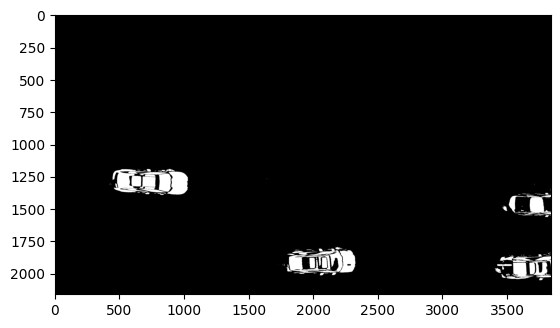

In [14]:
# Only take different areas that are different enough
thresh_frame = cv2.threshold(diff_frame, thresh=30, maxval=255, type=cv2.THRESH_BINARY)[1]

# Show
plt.imshow(thresh_frame, cmap='gray')
plt.show()

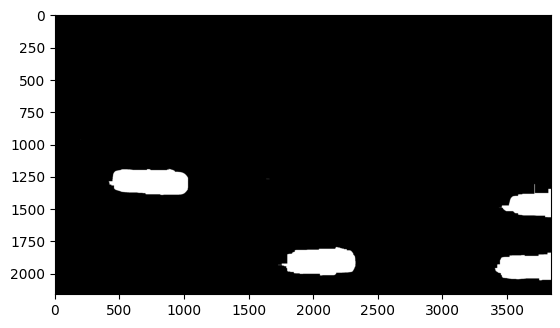

In [15]:
# Closing
closed_frame = cv2.morphologyEx(thresh_frame, cv2.MORPH_CLOSE, np.ones((100, 100), np.uint8))

# Show
plt.imshow(closed_frame, cmap='gray')
plt.show()

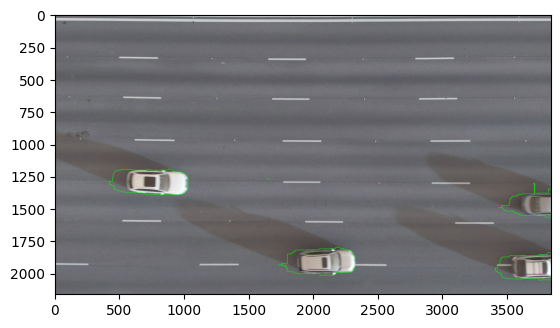

In [16]:
# Find contours
contours, _ = cv2.findContours(closed_frame, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)

# Draw contours
image_with_contours = cv2.drawContours(np.copy(image2), contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

# Show
plt.imshow(image_with_contours)
plt.show()

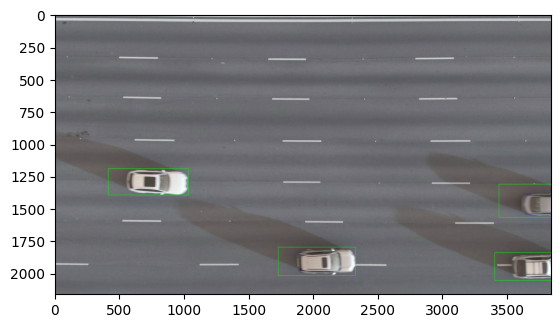

In [17]:
# Filter contours and draw bounding box
result = image2.copy()
for contour in contours:
  if cv2.contourArea(contour) > 2000:

    # Get boundign box of contour
    (x, y, w, h) = cv2.boundingRect(contour)

    # Draw bounding box
    cv2.rectangle(result, pt1=(x, y), pt2=(x + w, y + h), color=(0, 255, 0), thickness=2)

# Show
plt.imshow(result)
plt.show()